In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the raw datasets
raw_recipes_df = pd.read_csv('RAW_recipes.csv')
raw_users_df = pd.read_csv('RAW_interactions.csv')

In [5]:
# View recipes dataset
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
# View user interactions dataset
raw_users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [7]:
# Info about the recipe dataset
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [8]:
import pandas as pd

# Convert 'id' and 'contributor_id' to string, and 'submitted' to datetime
raw_recipes_df = raw_recipes_df.astype({
    'id': str,
    'contributor_id': str,
    'submitted': 'datetime64[ns]'
})

# Print updated data types of the columns
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            231636 non-null  object        
 1   id              231637 non-null  object        
 2   minutes         231637 non-null  int64         
 3   contributor_id  231637 non-null  object        
 4   submitted       231637 non-null  datetime64[ns]
 5   tags            231637 non-null  object        
 6   nutrition       231637 non-null  object        
 7   n_steps         231637 non-null  int64         
 8   steps           231637 non-null  object        
 9   description     226658 non-null  object        
 10  ingredients     231637 non-null  object        
 11  n_ingredients   231637 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 21.2+ MB


In [9]:
# Info about the recipe dataset
raw_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [10]:
# Convert 'user_id' and 'recipe_id' columns to object data type
raw_users_df['user_id'] = raw_users_df['user_id'].astype(str)
raw_users_df['recipe_id'] = raw_users_df['recipe_id'].astype(str)

# Convert 'submitted' column to date data type
raw_users_df['date'] = pd.to_datetime(raw_users_df['date'], format='%Y-%m-%d')

# Print updated data types of the columns
raw_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  object        
 1   recipe_id  1132367 non-null  object        
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   review     1132198 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.2+ MB


# Missing Data

In [11]:
# Checking for missing values
raw_recipes_df.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [12]:
# Row with missing name
raw_recipes_df[raw_recipes_df['name'].isna()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [13]:
# Drop row with missing name
raw_recipes_df.dropna(subset=['name'], inplace=True)

In [14]:
# Sanity check
raw_recipes_df.isna().sum()

name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [15]:
# Row with missing description
raw_recipes_df[raw_recipes_df['description'].isna()].sample(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
29690,broccoli sweet red pepper and oranges,43309,24,1533,2002-10-16,"['30-minutes-or-less', 'time-to-make', 'course...","[58.2, 2.0, 24.0, 0.0, 5.0, 1.0, 3.0]",8,"['microwave broccoli , red peppers , and 2 tab...",NaN,"['broccoli floret', 'sweet red peppers', 'oran...",5
186231,shrimp stuffed mushrooms,51261,25,10033,2003-01-14,"['30-minutes-or-less', 'time-to-make', 'course...","[94.8, 6.0, 6.0, 3.0, 14.0, 3.0, 2.0]",5,"['remove the stems from the mushrooms , trim a...",NaN,"['fresh large mushrooms', 'olive oil', 'celery...",9
6595,apple coleslaw,6622,0,39547,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...","[109.2, 7.0, 46.0, 1.0, 3.0, 13.0, 5.0]",5,"['sprinkle sliced apples with lemon juice', 'm...",NaN,"['apples', 'lemon juice', 'cabbage', 'celery',...",9
145474,nut and honey granola,65523,35,29300,2003-06-25,"['60-minutes-or-less', 'time-to-make', 'course...","[173.9, 9.0, 49.0, 0.0, 8.0, 3.0, 9.0]",9,"['preheat oven to 375 degrees f', 'in a small ...",NaN,"['canola oil', 'light maple syrup', 'honey', '...",9
119047,kung pao chicken martin yan,378710,20,714468,2009-06-24,"['30-minutes-or-less', 'time-to-make', 'course...","[415.3, 35.0, 48.0, 39.0, 54.0, 16.0, 8.0]",18,"['combine marinade ingredients in a bowl', 'st...",NaN,"['oyster sauce', 'cornstarch', 'boneless skinl...",19
73744,drunken sailors,24226,185,23302,2002-04-02,"['weeknight', 'time-to-make', 'course', 'main-...","[564.8, 26.0, 5.0, 64.0, 98.0, 13.0, 4.0]",7,['combine all ingredients in bowl suitable for...,NaN,"['raw shrimp', 'low sodium soy sauce', 'olive ...",12
188766,slow cooker bbq pinto beans,1100,0,1533,1999-08-14,"['15-minutes-or-less', 'time-to-make', 'course...","[350.6, 2.0, 63.0, 23.0, 34.0, 1.0, 22.0]",5,['combine first 4 ingredients in an electric s...,NaN,"['dried pinto bean', 'water', 'onions', 'chili...",8
201038,strawberry lime twister,21519,20,32957,2002-03-05,"['30-minutes-or-less', 'time-to-make', 'course...","[243.4, 0.0, 227.0, 0.0, 2.0, 0.0, 20.0]",4,"['bring the strawberries , sugar , and water t...",NaN,"['strawberries', 'water', 'granulated sugar', ...",5
39172,cheese yellow squash casserole,3866,65,1534,1999-11-02,"['time-to-make', 'course', 'main-ingredient', ...","[725.0, 83.0, 20.0, 52.0, 78.0, 167.0, 7.0]",17,"['coat baking dish lightly with butter', 'grat...",NaN,"['yellow squash', 'onion', 'seasoned bread cru...",11
95754,granola crunch mix,46541,75,1533,2002-11-17,"['weeknight', 'time-to-make', 'course', 'main-...","[436.7, 12.0, 41.0, 1.0, 31.0, 5.0, 26.0]",6,"['preheat oven to 250 degrees', 'combine the f...",NaN,"['mixed dried fruit', 'brown sugar', 'boiling ...",7


In [16]:
print(f"Missing values make up {raw_recipes_df.isna().mean().mean()*100:.2f}% of the overall data.")

Missing values make up 0.18% of the overall data.


In [17]:
# Drop rows with missing description
raw_recipes_df.dropna(subset=['description'], inplace=True)

In [18]:
# Sanity check
raw_recipes_df.isna().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

In [19]:
raw_users_df.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [20]:
missing_percentage = raw_users_df.isna().mean().mean() * 100
print(f"Missing values make up {missing_percentage:.2f}% of the overall data.")

Missing values make up 0.00% of the overall data.


In [21]:
# Drop rows with missing description
raw_users_df.dropna(subset=['review'], inplace=True)

In [22]:
# Sanity check
raw_users_df.isna().sum()

user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64

In [23]:
# Duplicated rows
print("duplicated rows in recipes dataset:", raw_recipes_df.duplicated().sum())
print("duplicated rows in user interactions dataset:", raw_users_df.duplicated().sum())

duplicated rows in recipes dataset: 0
duplicated rows in user interactions dataset: 0


# Outliers

In [24]:
# Summary statistics of recipes dataset
raw_recipes_df.describe()

,minutes,submitted,n_steps,n_ingredients
count,2.266570e+05,226657,226657.000000,226657.000000
mean,9.602472e+03,2006-12-22 20:53:20.176478208,9.773927,9.054170
min,0.000000e+00,1999-08-06 00:00:00,0.000000,1.000000
25%,2.000000e+01,2004-12-08 00:00:00,6.000000,6.000000
50%,4.000000e+01,2007-02-17 00:00:00,9.000000,9.000000
75%,6.500000e+01,2008-11-11 00:00:00,12.000000,11.000000
max,2.147484e+09,2018-12-04 00:00:00,145.000000,43.000000
std,4.510715e+06,NaN,5.999824,3.740942


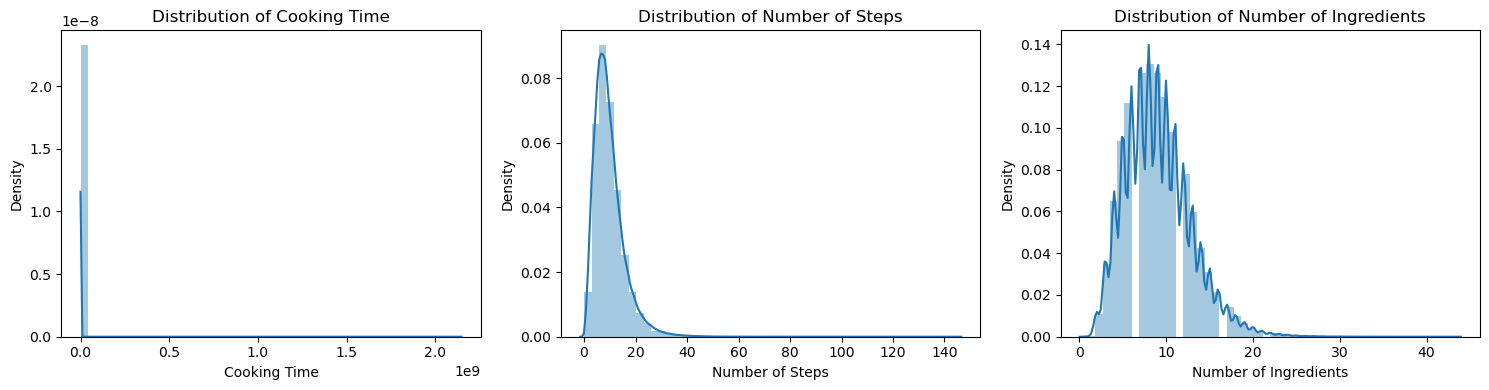

In [25]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Data to plot
plot_data = [
    ('minutes', 'Cooking Time'),
    ('n_steps', 'Number of Steps'),
    ('n_ingredients', 'Number of Ingredients')
]

# Plot distributions
for ax, (column, title) in zip(axes, plot_data):
    sns.distplot(raw_recipes_df[column], ax=ax)
    ax.set(xlabel=title, ylabel='Density', title=f'Distribution of {title}')

plt.tight_layout()
plt.show()

In [26]:
# Use the updated style name
plt.style.use('seaborn-v0_8')

# Or for specific styles:
plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('seaborn-v0_8-darkgrid')

# Define the columns we're interested in
columns = ['minutes', 'n_steps', 'n_ingredients']

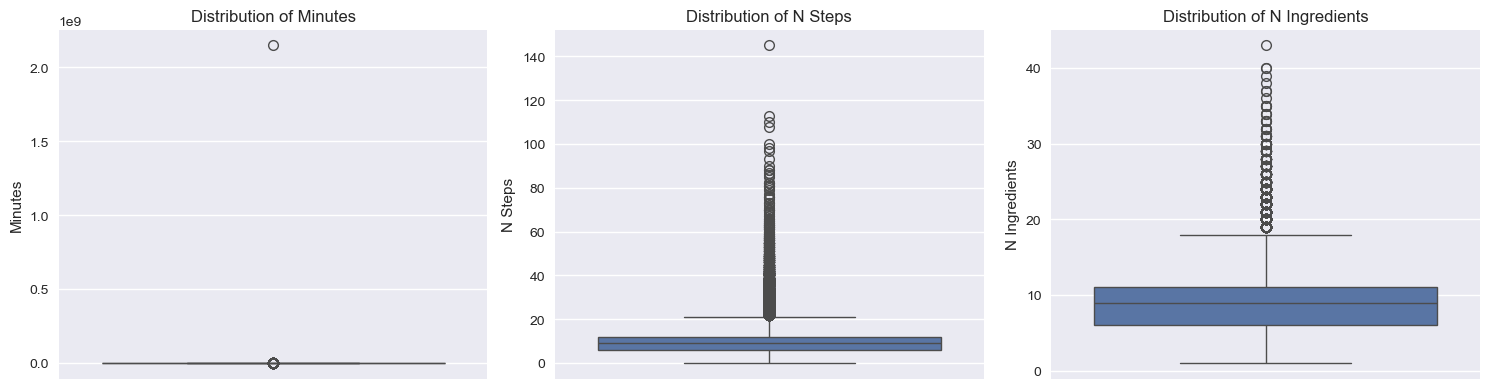

In [27]:
# 1. Boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(columns):
    sns.boxplot(data=raw_recipes_df[col], ax=axes[i])
    axes[i].set_ylabel(col.replace('_', ' ').title())
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

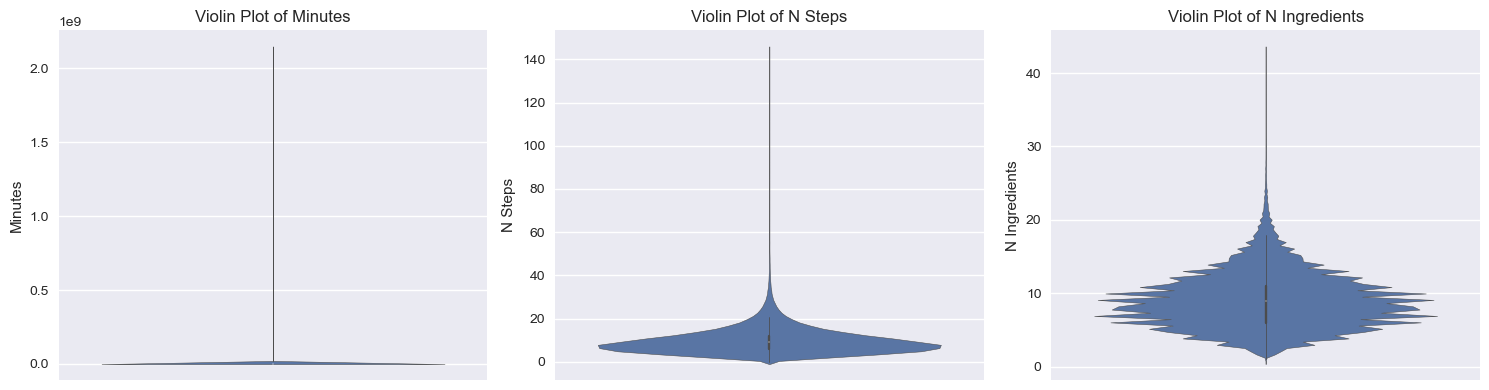

In [28]:
# 2. Violin Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(columns):
    sns.violinplot(data=raw_recipes_df[col], ax=axes[i])
    axes[i].set_ylabel(col.replace('_', ' ').title())
    axes[i].set_title(f'Violin Plot of {col.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

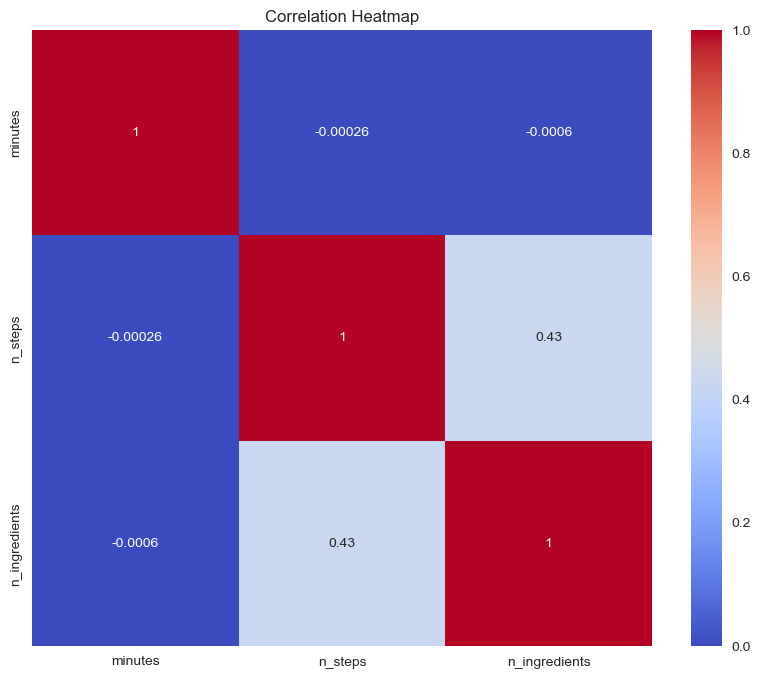

In [29]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(raw_recipes_df[columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

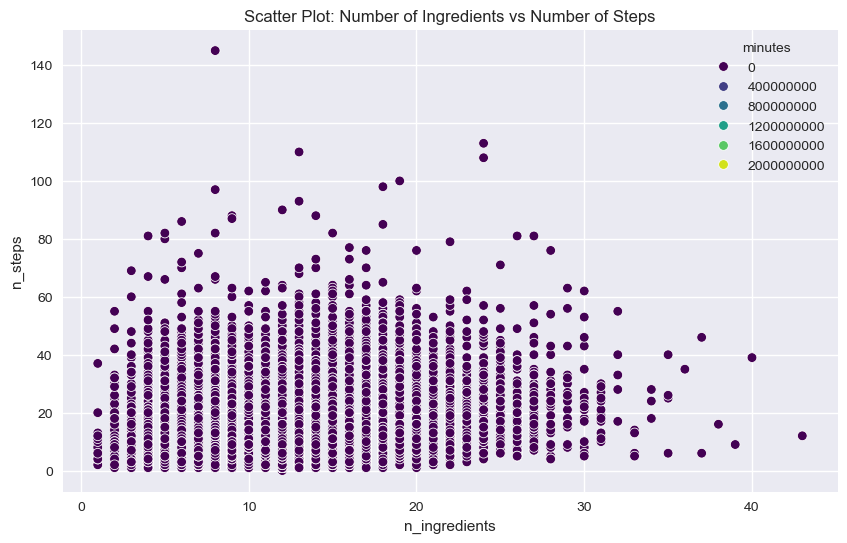

In [30]:
# 4. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_recipes_df, x='n_ingredients', y='n_steps', hue='minutes', palette='viridis')
plt.title('Scatter Plot: Number of Ingredients vs Number of Steps')
plt.show()

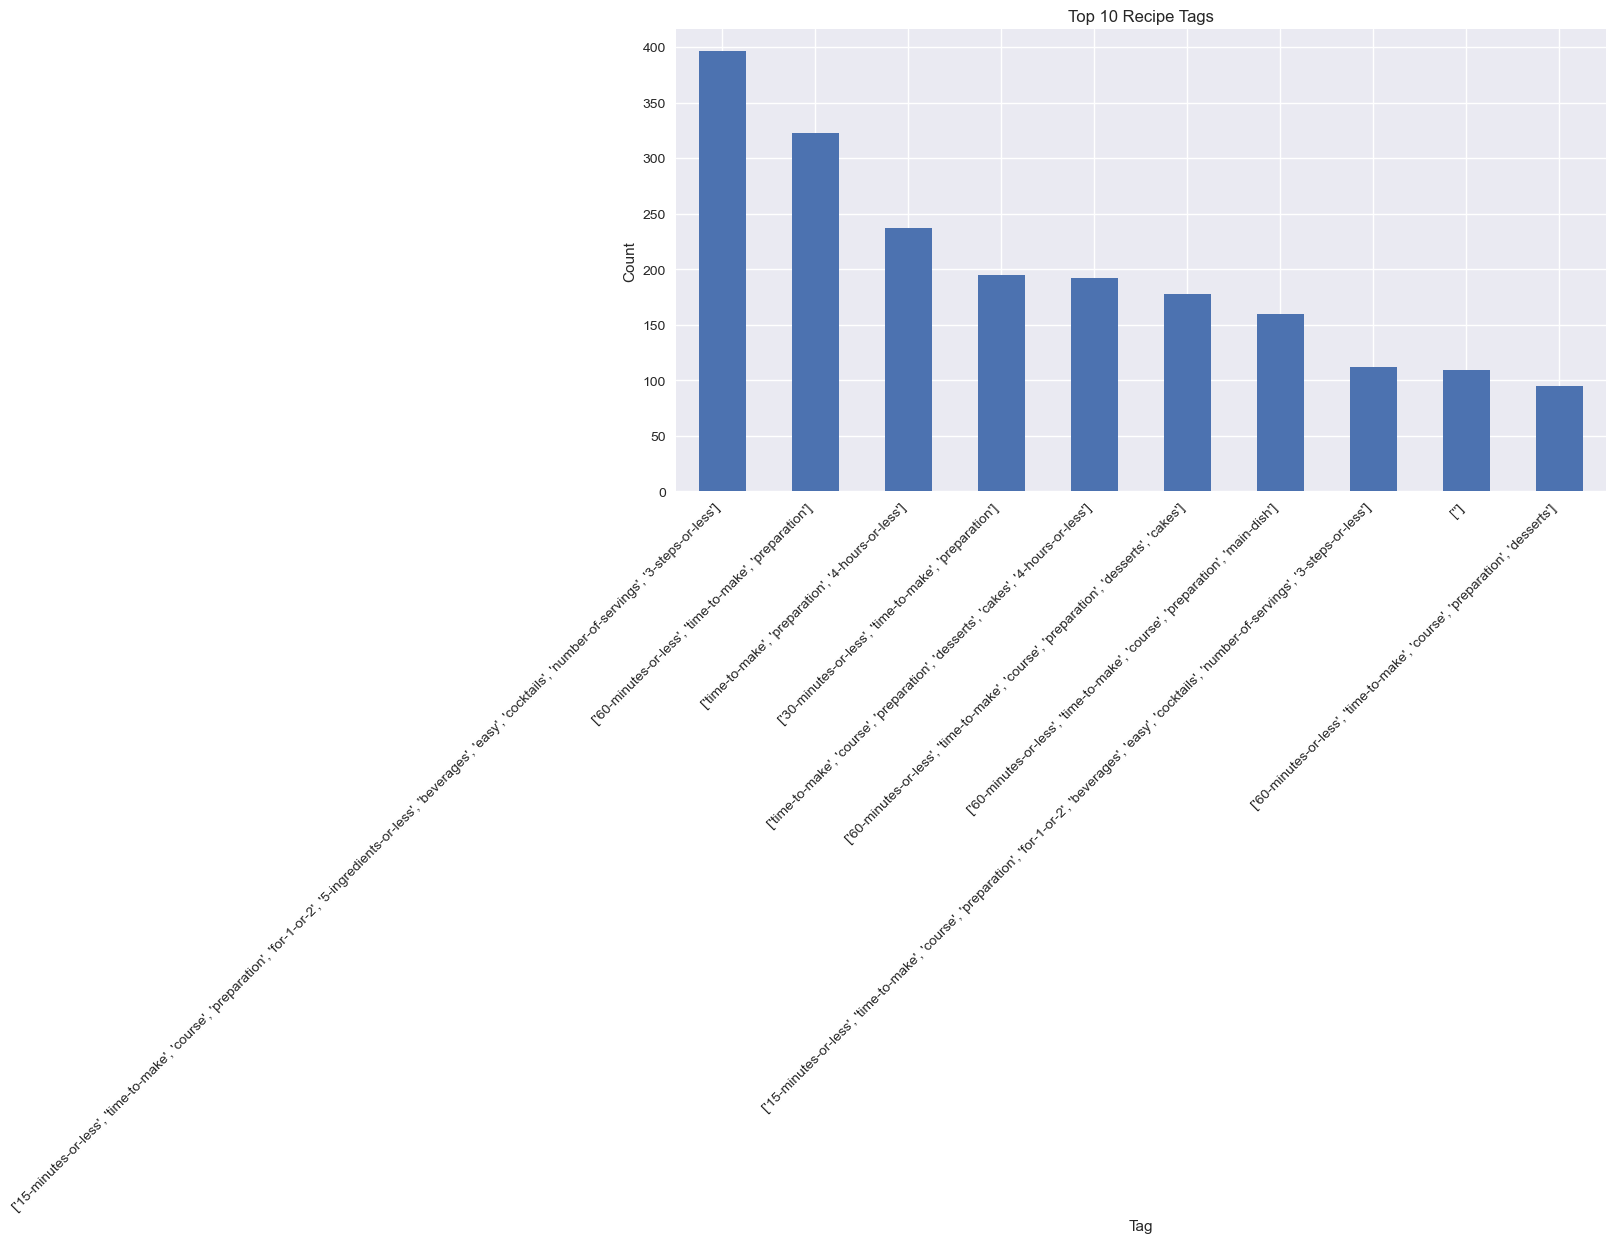

In [31]:
# 6. Bar Plot of Top 10 Tags
plt.figure(figsize=(12, 6))
raw_recipes_df['tags'].explode().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Recipe Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
import numpy as np

def get_outliers(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].sort_values(column)

minutes_outliers = get_outliers(raw_recipes_df, 'minutes')
minutes_outliers

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
206778,sweet rice pudding,454411,133,1889545,2011-04-25,"['time-to-make', 'course', 'main-ingredient', ...","[338.6, 12.0, 185.0, 3.0, 16.0, 20.0, 19.0]",23,"['place the rice in a medium-sized bowl', 'fil...",this is a traditional recipe from india and it...,"['basmati rice', 'whole milk', 'granulated sug...",7
204465,super soft bread machine rolls with wheat germ,210241,133,260718,2007-02-09,"['time-to-make', 'course', 'main-ingredient', ...","[1580.3, 93.0, 106.0, 92.0, 83.0, 171.0, 71.0]",7,"['in bread machine pan , put in the following ...",this recipe is adapted from the buttery bread ...,"['milk', 'vanilla essence', 'butter', 'sugar',...",9
94271,gooey butter cookies,34390,133,43121,2002-07-16,"['weeknight', 'time-to-make', 'course', 'prepa...","[163.3, 14.0, 49.0, 8.0, 3.0, 23.0, 5.0]",8,"['cream together cream cheese and butter', 'ad...",so easy to make and always a hit!,"['cream cheese', 'butter', 'egg', 'vanilla', '...",6
99018,grilled halibut with lemon tarragon mustard,116898,134,39547,2005-04-12,"['time-to-make', 'course', 'main-ingredient', ...","[470.1, 23.0, 2.0, 16.0, 153.0, 12.0, 1.0]",8,['in a small bowl whisk together the lemon jui...,"adapted from a recipe in ""the taste of summer""...","['fresh lemon juice', 'lemon, zest of', 'dijon...",9
183119,sea bass with citrus and soy,23101,134,8688,2002-03-21,"['weeknight', 'time-to-make', 'course', 'main-...","[275.1, 16.0, 24.0, 60.0, 69.0, 9.0, 3.0]",14,"['mix first 6 ingredients in 8x8x2"" glass baki...","simple, elegant and healthy, too! what more ca...","['pineapple juice', 'orange juice', 'soy sauce...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2


The Tukey method for finding outliers removes many recipes with long, but reasonable, preparation times. For example, pickles and liqueurs can take days or weeks to make, which isn't unusual for these types of recipes.

We found one extreme outlier: a recipe for 'No Bake Granola Balls' with a 1,051,200-minute preparation time (about 2 years). This is likely a data error. Instead of trying to fix this, we'll remove this recipe from our analysis to avoid skewing our results.

For our study, we'll focus on more typical cooking times and exclude very long preparations like pickles or data errors like the granola balls recipe.

In [33]:
# Replace thie cooking time with 25 minutes
raw_recipes_df.loc[raw_recipes_df['id'] == '261647', 'minutes'] = 25

# Check value
raw_recipes_df[raw_recipes_df['id'] == '261647']

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,25,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


We found another recipe with an extremely long preparation time: 'How to Preserve a Husband' at 1,051,200 minutes (about 2 years). While interesting, we'll remove this outlier to focus on more typical recipes in our dataset.

In [34]:
# Remove row
raw_recipes_df = raw_recipes_df[raw_recipes_df['id'] != '447963']

In [35]:
# Sanity check
raw_recipes_df.sort_values('minutes', ascending=True).tail()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5497,angelica liqueur,70551,201610,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisi...","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7,"['crush the fennel , aniseed , coriander seeds...",finish off a large meal with a tiny glass of t...,"['fennel seed', 'anise seed', 'coriander seeds...",7
155044,peach brandy,98912,216015,34146,2004-09-01,"['time-to-make', 'course', 'main-ingredient', ...","[3645.3, 3.0, 2040.0, 0.0, 16.0, 0.0, 173.0]",9,"['use only fully ripened , unblemished fruit',...",posted in reply to a message board request for,"['fresh peaches', 'granulated sugar', 'honey',...",4
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3


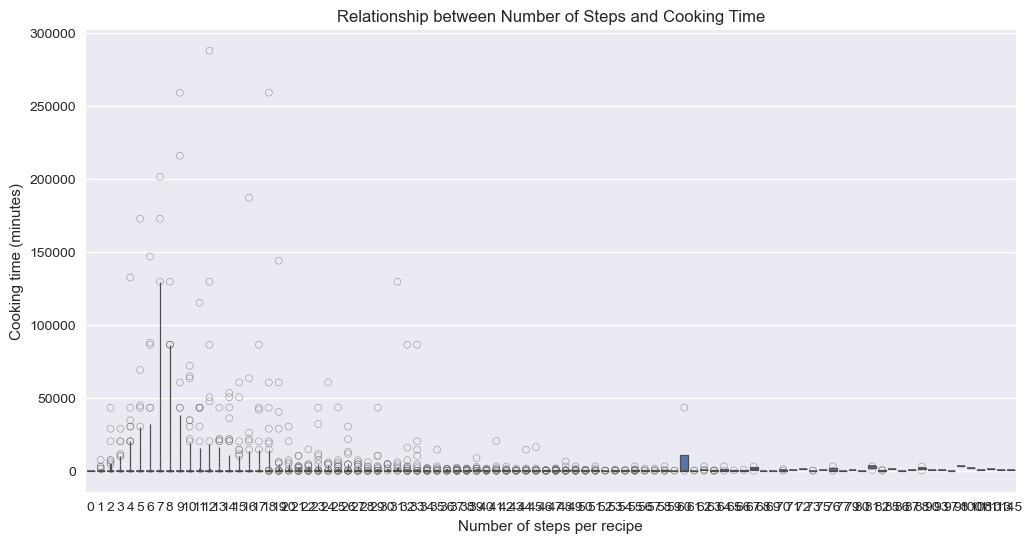

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=raw_recipes_df, x='n_steps', y='minutes', ax=ax)
ax.set_xlabel('Number of steps per recipe')
ax.set_ylabel('Cooking time (minutes)')
plt.title('Relationship between Number of Steps and Cooking Time')
plt.show()

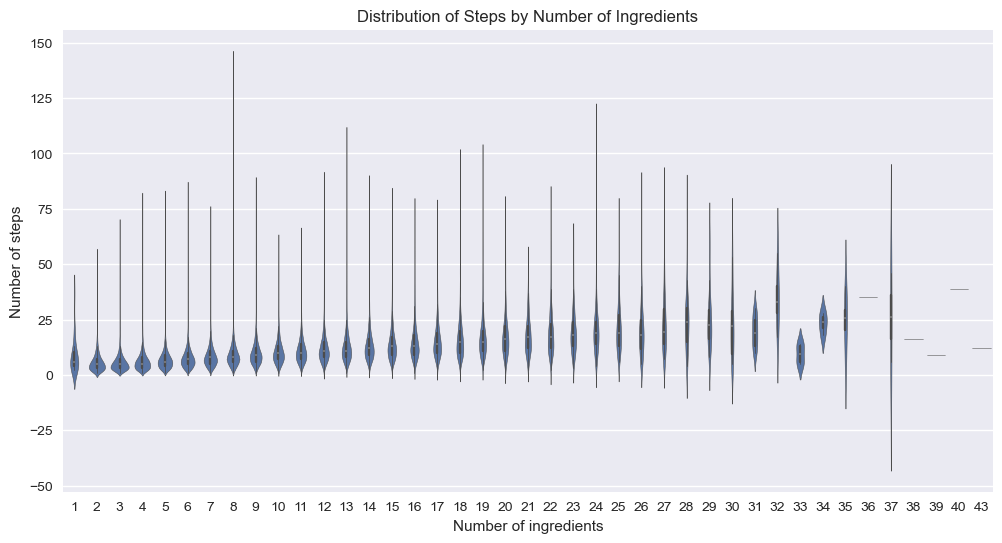

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=raw_recipes_df, x='n_ingredients', y='n_steps', ax=ax)
ax.set_xlabel('Number of ingredients')
ax.set_ylabel('Number of steps')
plt.title('Distribution of Steps by Number of Ingredients')
plt.show()

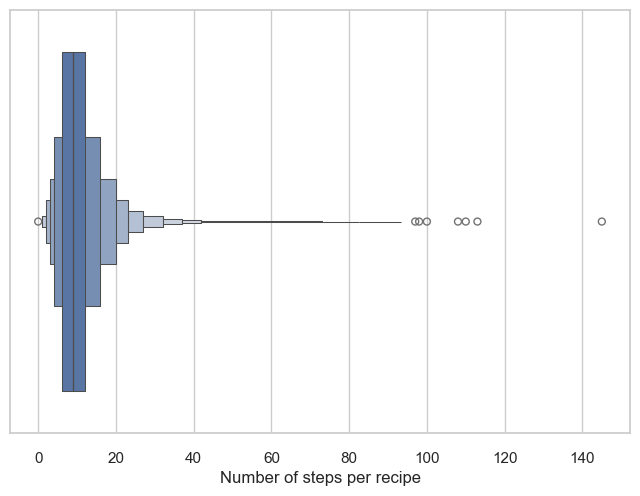

In [38]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [39]:
# Number of steps
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_steps'].quantile(0.25)
Q3 = raw_recipes_df['n_steps'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_steps'] > max_value) | (raw_recipes_df['n_steps'] < min_value)]
nsteps_outliers.sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
216131,traditional iraqi casserole tepsi baytinijan,288850,90,510313,2008-02-27,"['time-to-make', 'course', 'main-ingredient', ...","[375.5, 20.0, 51.0, 7.0, 44.0, 25.0, 15.0]",22,['peel the eggplant in wide stripes and remove...,in iraq tepsi baytinijan is a very famous dish...,"['eggplants', 'tomatoes', 'onion', 'garlic clo...",10
70506,deep dish pizza with sausage garlic and mozz...,224394,75,37779,2007-04-24,"['time-to-make', 'course', 'main-ingredient', ...","[929.5, 104.0, 48.0, 113.0, 107.0, 147.0, 7.0]",22,['position oven rack on the 2nd-lowest level i...,a husband favorite,"['olive oil', 'pizza dough', 'mild italian sau...",7
169411,quick tikka masala,369865,45,31807,2009-05-05,"['60-minutes-or-less', 'time-to-make', 'course...","[514.5, 41.0, 8.0, 8.0, 114.0, 54.0, 2.0]",22,['grate 1 piece of ginger into a large zip top...,"adapted from blake royer's ""dinner tonight"" co...","['fresh ginger', 'garlic clove', 'salt', 'grou...",17
33105,cabbage tart,62295,85,80353,2003-05-15,"['weeknight', 'time-to-make', 'course', 'main-...","[614.3, 65.0, 18.0, 41.0, 29.0, 124.0, 14.0]",22,"['for pastry: in a large bowl , combine flour ...",kind of like a cabbage quiche. very tasty - do...,"['all-purpose flour', 'salt', 'butter', 'egg y...",12
132832,meatloaf with tomato gravy,112892,90,126440,2005-03-07,"['time-to-make', 'course', 'main-ingredient', ...","[771.1, 84.0, 26.0, 89.0, 93.0, 97.0, 7.0]",22,"['preheat the oven to 350f', 'in a large skill...",this recipe came from food network. i have mad...,"['dry breadcrumbs', 'olive oil', 'onion', 'gar...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
70088,death by chocolate a la trellis,356724,1680,467583,2009-02-19,"['time-to-make', 'course', 'main-ingredient', ...","[1460.8, 189.0, 262.0, 14.0, 50.0, 380.0, 36.0]",100,"['take a deep breath', ""make sure that you wil...",warning: this dessert is not meant to be eaten...,"['egg whites', 'cream of tartar', 'salt', 'gra...",19
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,87300,2003-06-18,"['weeknight', 'time-to-make', 'course', 'main-...","[442.8, 35.0, 27.0, 33.0, 50.0, 60.0, 10.0]",108,['roast garlic: place oven rack on second notc...,"this creamy, gooey, gorgeous white lasagna wil...","['garlic', 'extra virgin olive oil', 'dry whit...",24
51532,chocolate raspberry ruffle cake,156874,1080,10033,2006-02-21,"['time-to-make', 'course', 'main-ingredient', ...","[5080.8, 616.0, 967.0, 25.0, 147.0, 1211.0, 12...",110,['first of all: these are not typical directio...,"alice medrich recipe, found in baking with jul...","['unsalted butter', 'pure vanilla extract', 'a...",13
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...","['cake flour', 'baking soda', 'salt', 'godiva ...",24


In [40]:
# Print the number of outliers
print(f"Based on the Tukey test, {len(nsteps_outliers)} rows are outliers.")

Based on the Tukey test, 9837 rows are outliers.


In [41]:
# Drop outliers
raw_recipes_df = raw_recipes_df.drop(nsteps_outliers.index)

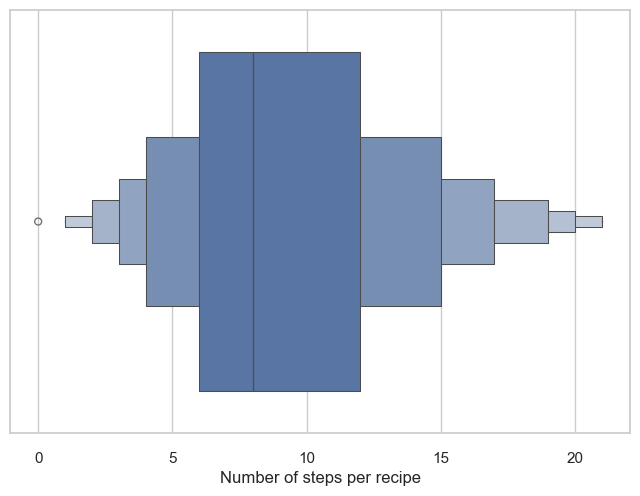

In [42]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

The boxen plot shows an outlier at the low end. Some recipes have zero steps, which doesn't make sense. We'll remove these by keeping only recipes with at least one step. This ensures our dataset has complete, meaningful recipes.

In [44]:
# Check dataframe
raw_recipes_df.head().sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11


In [45]:
# Filter for recipes with at least 1 step
raw_recipes_df = raw_recipes_df[raw_recipes_df['n_steps'] > 0]

In [46]:
# Sanity check
raw_recipes_df.head().sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11


In [47]:
# Number of ingredients
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_ingredients'].quantile(0.25)
Q3 = raw_recipes_df['n_ingredients'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_ingredients'] > max_value) | (raw_recipes_df['n_ingredients'] < min_value)]
nsteps_outliers.sort_values('n_ingredients')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
95755,granola extreme,43916,45,27443,2002-10-22,"['60-minutes-or-less', 'time-to-make', 'course...","[105.0, 10.0, 10.0, 2.0, 5.0, 5.0, 3.0]",9,"[""preheat oven 300' degrees"", 'spray 2 baking ...","wholesome snack, great topping for vanilla yogurt","['oatmeal', 'wheat flakes', 'buckwheat flakes'...",19
137311,mocha mini bread loaves,349861,40,1109972,2009-01-14,"['60-minutes-or-less', 'time-to-make', 'course...","[268.4, 12.0, 75.0, 12.0, 14.0, 11.0, 14.0]",7,"['preheat oven to 350 degrees', 'combine dry i...",this is adapted from camilla saulsbury's muffi...,"['whole wheat flour', 'quick-cooking oats', 't...",19
68576,curried meatballs,315007,35,331557,2008-07-22,"['curries', '60-minutes-or-less', 'time-to-mak...","[414.4, 36.0, 21.0, 32.0, 59.0, 34.0, 6.0]",8,['heat oil over medium heat and stir-fry the o...,i was given this recipe by a co-worker of mine...,"['olive oil', 'onions', 'cinnamon stick', 'wat...",19
214382,tofu spinach calzones vegan or vegetarian,97154,35,37584,2004-08-06,"['60-minutes-or-less', 'time-to-make', 'course...","[346.1, 6.0, 8.0, 14.0, 21.0, 3.0, 21.0]",17,['mix water with yeast and sugar in a large mi...,these are great and vegan or vegetarian (see s...,"['warm water', 'yeast', 'sugar', 'salt', 'flou...",19
68671,curried rice and fruit salad,63805,65,37779,2003-06-05,"['weeknight', 'time-to-make', 'course', 'main-...","[379.1, 11.0, 86.0, 16.0, 12.0, 14.0, 24.0]",18,"['wash rice until water runs clear', 'drain we...",this rice salad has exotic flavors that make a...,"['basmati rice', 'peanut oil', 'green onion', ...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
105723,hillbilly bean soup,11737,255,10404,2001-09-18,"['weeknight', 'time-to-make', 'course', 'main-...","[323.0, 2.0, 254.0, 1.0, 8.0, 1.0, 27.0]",6,"['boil the drained , soaked beans with the wat...",great soup for a fall or winters dinner. serve...,"['7 bean mix', 'water', 'ham bone', 'bay leaf'...",35
203614,sunday supper taco salad bowls tacos,502219,240,695000,2013-06-23,"['time-to-make', 'course', 'cuisine', 'prepara...","[10687.7, 1784.0, 49.0, 67.0, 59.0, 802.0, 26.0]",6,['heat vegetable oil to 350f submerge tortilla...,being served again at the free sunday supper o...,"['flour tortillas', 'ground beef', 'vegetable ...",37
18352,basic fried rice with variations,248707,55,305531,2007-08-25,"['60-minutes-or-less', 'time-to-make', 'course...","[793.3, 22.0, 8.0, 23.0, 37.0, 13.0, 48.0]",16,"['dice or shred meat and vegetables', 'heat oi...",another recipe that i acquired from a chinese ...,"['brown rice', 'green onions', 'oil', 'soy sau...",38
116744,kato s garage style tomato sauce meatba...,113677,270,128473,2005-03-18,"['time-to-make', 'course', 'main-ingredient', ...","[412.8, 36.0, 61.0, 47.0, 46.0, 38.0, 8.0]",9,"['spicy tomatoe & vegetable sauce', 'in a larg...",this is our favourite spagetti dinner...we mak...,"['sweet onion', 'garlic cloves', 'green pepper...",39


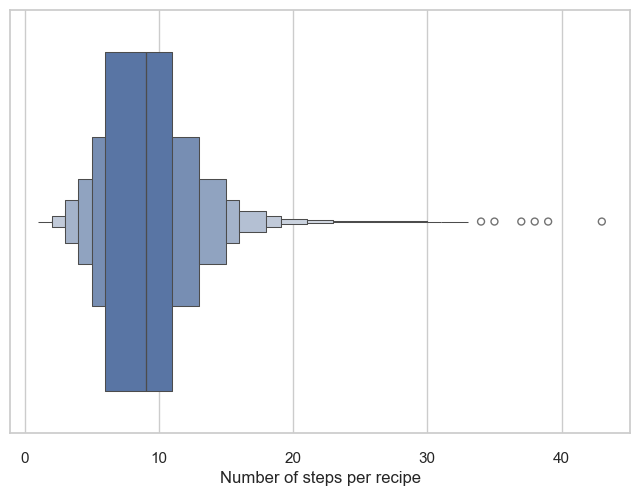

In [48]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_ingredients'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

• 'A to Z Bread' has the most ingredients of any recipe in our dataset.

• Many of these ingredients are optional.

• While it's far from average, we'll keep this recipe in our dataset because:

- It adds variety
- It shows how complex some recipes can be
- It helps represent the full range of cooking styles

• Keeping this outlier gives us a more complete picture of the recipes in our dataset.

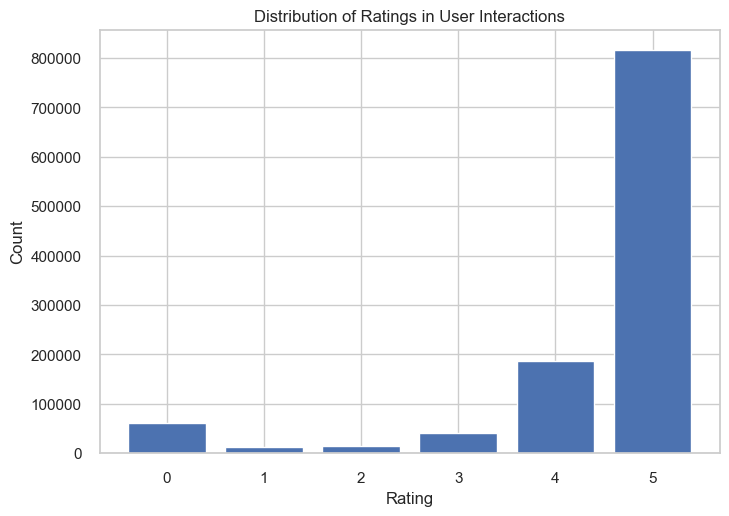

In [49]:
# Distribution of ratings

rating_counts = raw_users_df['rating'].value_counts().sort_index()
ratings = rating_counts.index
counts = rating_counts.values

plt.bar(ratings, counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in User Interactions')

plt.show()

In [50]:
# Keep rows that have ratings between 1 and 5
raw_users_df = raw_users_df[raw_users_df['rating'] != 0]
raw_users_df.sort_values('rating')

,user_id,recipe_id,date,rating,review
704658,1762248,428870,2013-09-10,1,These were so awful that my husband threw them...
305820,856238,213319,2008-06-07,1,"There are no stars for less than ""one"". Not g..."
305823,1263812,213319,2009-07-02,1,"Yuck! While it's palatable, it's not fudge-li..."
305824,538920,213319,2009-08-07,1,Some things just should simply not be made low...
822728,4395,4829,2001-01-10,1,I believe there is a mistake in the amount of ...
...,...,...,...,...,...
428408,431813,171157,2007-06-27,5,Wow! This far exceeded my expectations. The ...
428409,546894,171157,2007-07-27,5,I have made this several times for guests and ...
428410,819967,171157,2009-05-19,5,"Amazing recipe, this will be my standard recip..."
428365,110433,22149,2007-05-13,5,This was so juicy and had just a little kick t...


# Preprocessing

In [51]:
# View recipes dataset
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [52]:
# View user interactions dataset
raw_users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


We can split the 'date' column in the user interactions dataset into separate month and year columns. Next, we'll perform this transformation to better analyze the data.

# Feature Engineering

In [53]:
import ast

# Define nutrition columns
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

# Split 'nutrition' into separate columns
raw_recipes_df[nutrition_columns] = raw_recipes_df['nutrition'].apply(ast.literal_eval).apply(pd.Series)

# Drop the original 'nutrition' column
raw_recipes_df = raw_recipes_df.drop('nutrition', axis=1)

In [54]:
# Sanity check
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [55]:
# Check datatypes of new columns
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216818 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            216818 non-null  object        
 1   id              216818 non-null  object        
 2   minutes         216818 non-null  int64         
 3   contributor_id  216818 non-null  object        
 4   submitted       216818 non-null  datetime64[ns]
 5   tags            216818 non-null  object        
 6   n_steps         216818 non-null  int64         
 7   steps           216818 non-null  object        
 8   description     216818 non-null  object        
 9   ingredients     216818 non-null  object        
 10  n_ingredients   216818 non-null  int64         
 11  calories        216818 non-null  float64       
 12  total_fat       216818 non-null  float64       
 13  sugar           216818 non-null  float64       
 14  sodium          216818 non-null  float64 

In [56]:
# View date column name
raw_recipes_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat',
       'carbohydrates'],
      dtype='object')

In [57]:
# Extract month and year
raw_recipes_df['submitted_month'] = raw_recipes_df['submitted'].dt.strftime('%b')
raw_recipes_df['submitted_year'] = raw_recipes_df['submitted'].dt.year

# Sanity check
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_month,submitted_year
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Sep,2005
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Jun,2002
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Feb,2005
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Apr,2003
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Oct,2002


In [58]:
# View date column name
raw_users_df.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')

In [60]:
# Extract month abbreviation and year from 'date'
raw_users_df['review_month'] = raw_users_df['date'].dt.strftime('%b')
raw_users_df['review_year'] = raw_users_df['date'].dt.year

# Display the first few rows to verify the changes
print(raw_users_df[['date', 'review_month', 'review_year']].head())

# Optional: Check unique values to ensure correct extraction
print("\nUnique months:", raw_users_df['review_month'].unique())
print("Year range:", raw_users_df['review_year'].min(), "to", raw_users_df['review_year'].max())

        date review_month  review_year
0 2003-02-17          Feb         2003
1 2011-12-21          Dec         2011
2 2002-12-01          Dec         2002
3 2010-02-27          Feb         2010
4 2011-10-01          Oct         2011

Unique months: ['Feb' 'Dec' 'Oct' 'May' 'Sep' 'Mar' 'Apr' 'Nov' 'Jun' 'Aug' 'Jan' 'Jul']
Year range: 2000 to 2018


In [61]:
# Define the tags we want to create features for
target_tags = ['dairy-free', 'gluten-free', 'low-carb', 'vegan', 'vegetarian']

# Create new features using vectorized operations
for tag in target_tags:
    raw_recipes_df[tag] = raw_recipes_df['tags'].str.contains(tag, case=False, regex=False).astype(int)

# Verify the new features
print(raw_recipes_df[['tags'] + target_tags].head())

# Optional: Check the distribution of new features
print("\nDistribution of new features:")
print(raw_recipes_df[target_tags].sum().sort_values(ascending=False))

                                                tags  dairy-free  gluten-free  \
0  ['60-minutes-or-less', 'time-to-make', 'course...           0            0   
1  ['30-minutes-or-less', 'time-to-make', 'course...           0            0   
2  ['time-to-make', 'course', 'preparation', 'mai...           0            0   
3  ['60-minutes-or-less', 'time-to-make', 'course...           0            0   
4  ['weeknight', 'time-to-make', 'course', 'main-...           0            0   

   low-carb  vegan  vegetarian  
0         0      0           1  
1         0      0           0  
2         0      0           0  
3         0      0           0  
4         0      0           1  

Distribution of new features:
low-carb       40144
vegetarian     33816
vegan           9628
gluten-free     5392
dairy-free       187
dtype: int64


We'll keep our data strategy simple:

1. EDA Phase:

   • Recipe dataset and user interaction dataset remain separate

   • This allows for focused analysis on each dataset's unique characteristics

3. Modeling Phase:

   • We'll merge the datasets

   • We'll keep only the essential information needed for our models

This approach gives us flexibility in analysis and efficiency in modeling.

## Ratings

We'll keep all the details from the recipes and just the ratings from user interactions. This will help us understand how people feel about specific recipes and make better recommendations

In [63]:
# View the column names
raw_users_df.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'review_month',
       'review_year'],
      dtype='object')

In [64]:
# Create a new df that contains the recipe_id and rating only
user_rating = raw_users_df[['recipe_id', 'rating']].copy()
user_rating

,recipe_id,rating
0,40893,4
1,40893,5
2,44394,4
3,85009,5
4,85009,5
...,...,...
1132360,82303,5
1132363,386618,5
1132364,78003,5
1132365,78003,4


In [65]:
# Group by recipe and take the count and the average rating
user_rating = user_rating.groupby(['recipe_id'])['rating'].agg(['mean','count'])
user_rating.reset_index(inplace=True)

# View table
user_rating.head()

,recipe_id,mean,count
0,100,3.000000,2
1,10000,3.000000,1
2,100000,4.708333,24
3,100001,4.666667,3
4,100002,4.000000,1


In [66]:
# Rename columns 
user_rating.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)

# View table
user_rating

,recipe_id,average_rating,votes
0,100,3.000000,2
1,10000,3.000000,1
2,100000,4.708333,24
3,100001,4.666667,3
4,100002,4.000000,1
...,...,...,...
226578,99995,4.545455,11
226579,99996,5.000000,11
226580,99997,4.000000,1
226581,99998,5.000000,2


In [67]:
# Merge ratings dataframe with recipe Dataframe
food_df = pd.merge(raw_recipes_df, user_rating, left_on='id',right_on='recipe_id')

# View table
food_df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian,recipe_id,average_rating,votes
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,Sep,2005,0,0,0,0,1,137739,5.000000,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,Jun,2002,0,0,0,0,0,31490,4.666667,3
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,Feb,2005,0,0,0,0,0,112140,4.000000,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,Apr,2003,0,0,0,0,0,59389,4.500000,2
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,Oct,2002,0,0,0,0,1,44061,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212250,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",...,Aug,2012,0,0,0,0,0,486161,5.000000,6
212251,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",...,Jan,2013,0,0,0,1,1,493372,5.000000,1
212252,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",...,Jun,2008,0,0,0,0,0,308080,5.000000,5
212253,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",...,Apr,2008,0,0,0,0,0,298512,1.000000,1


In [68]:
# Final sanity check
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212255 entries, 0 to 212254
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   name             212255 non-null  object        
 1   id               212255 non-null  object        
 2   minutes          212255 non-null  int64         
 3   contributor_id   212255 non-null  object        
 4   submitted        212255 non-null  datetime64[ns]
 5   tags             212255 non-null  object        
 6   n_steps          212255 non-null  int64         
 7   steps            212255 non-null  object        
 8   description      212255 non-null  object        
 9   ingredients      212255 non-null  object        
 10  n_ingredients    212255 non-null  int64         
 11  calories         212255 non-null  float64       
 12  total_fat        212255 non-null  float64       
 13  sugar            212255 non-null  float64       
 14  sodium           212

# Saving the data


After cleaning our data, let’s save it for later. This way, we can easily look at it when we start exploring and analyzing the data.

In [ ]:
# Save the clean datasets

# Individual ones for EDA
raw_recipes_df.to_pickle("clean_recipes.pkl")
raw_users_df.to_pickle("clean_interactions.pkl")
# Merged for modelling
food_df.to_pickle("food.pkl")